18469.27256238881 -23.10595421852649 0.0013689925633507854
2.172259 0.18623583
1.1880037547792994 0.1847134441545971 1.6758531936175047


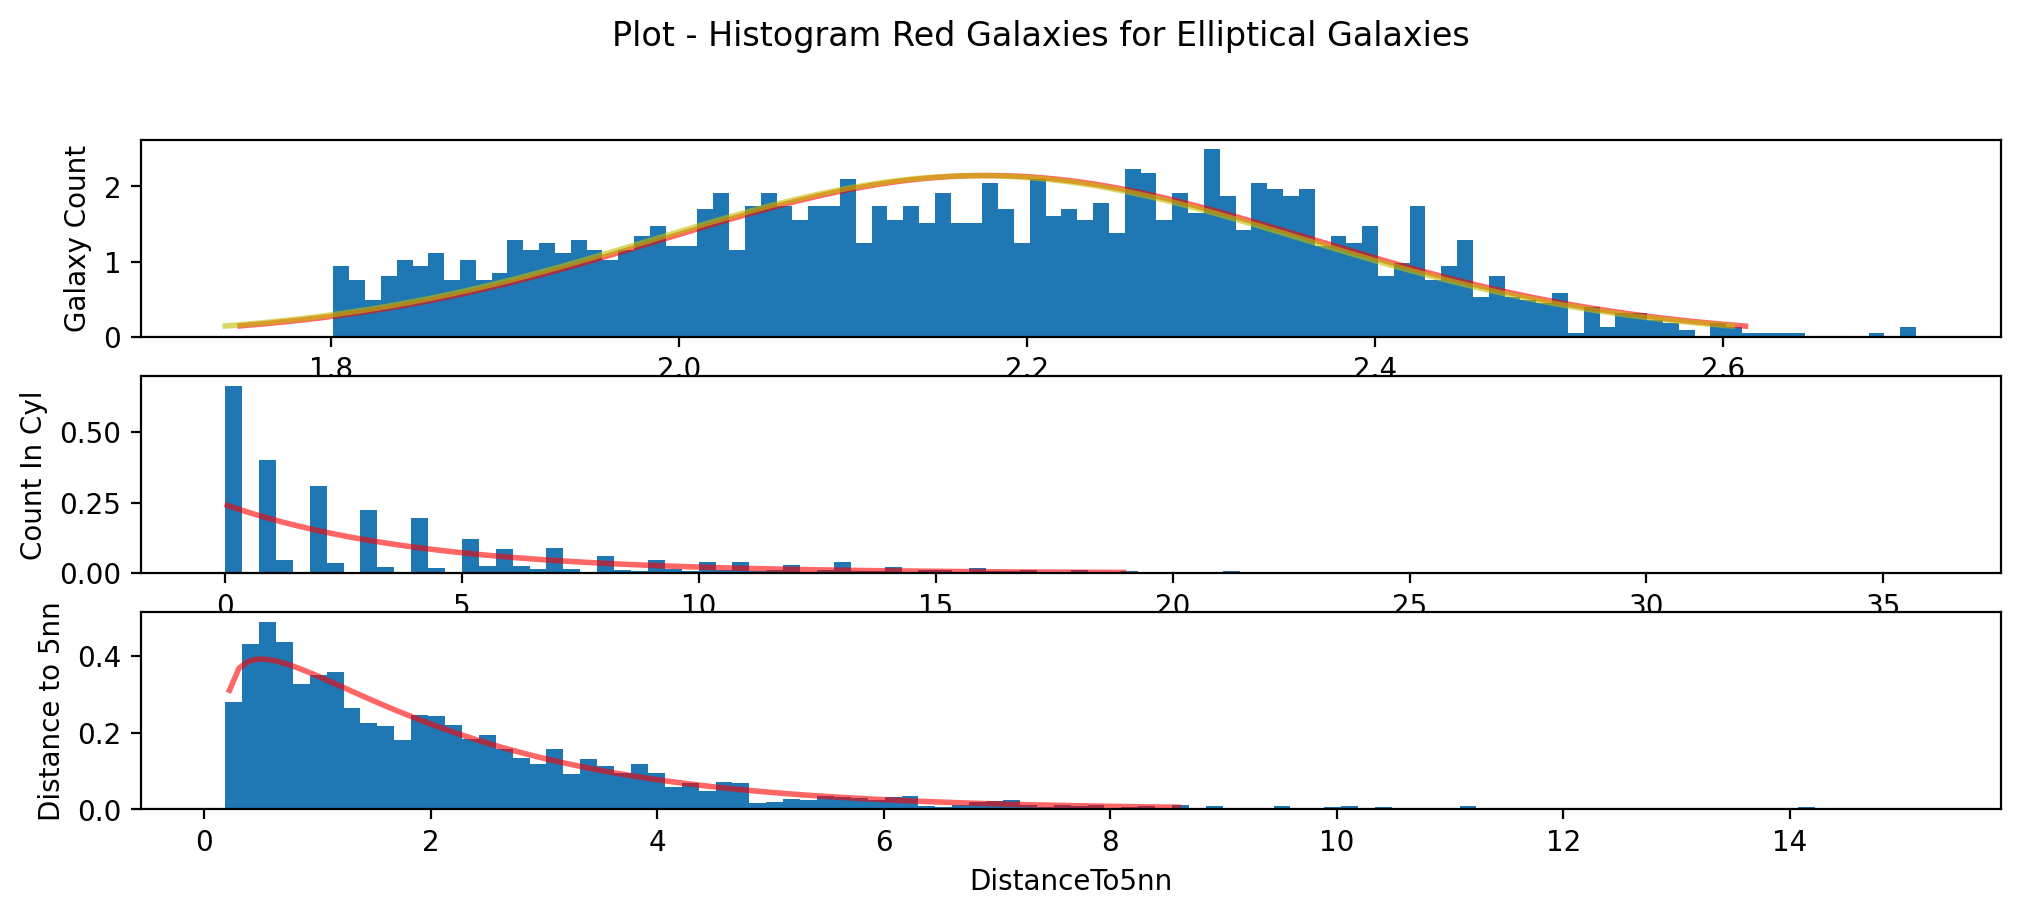

In [74]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot

RawMassEClassEmeasure = Table.read('../../GAMA_Data/REMassEClassEmeasure.fits')
#print(RawMassEClassEmeasure.colnames)
# CLEAN DATA
#REMassEClassEmeasure = RawMassEClassEmeasure[RawMassEClassEmeasure['CountInCyl']> -500]
RErange = RawMassEClassEmeasure[RawMassEClassEmeasure['CountInCyl']> -500]
RErange1 = RErange[RErange['SurfaceDensity']< 50]

binCount = 100
alphaVal = .3

##### uminusr
fig = plt.figure(figsize=(12, 6), dpi=200)
fig.suptitle('Plot - Histogram Red Galaxies for Elliptical Galaxies')
#fig.legend(loc="upper right")
#import scipy.stats as stats
from scipy import stats
xfield = 'uminusr'
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#print(counts)

ax1 = fig.add_subplot(4, 1, 1)
ax1.set_ylabel('Galaxy Count')
ax1.set_xlabel(xfield)
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#ax1.hist(bins[:-1],bins, weights=counts)

ag, bg, cg =stats.gamma.fit(RErange1[xfield].data)
print(ag, bg, cg)
xg0, xg1 = stats.gamma.ppf([0.01, 0.99], ag, loc = bg, scale=cg)
xg = np.linspace(xg0,xg1, int(ag))

an, bn =stats.norm.fit(RErange1[xfield].data)
print(an, bn)
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)

ax1.plot(xg, stats.gamma.pdf(xg, ag, loc=bg, scale = cg),'r-', lw=2, alpha=0.6, label='gamma pdf')
ax1.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')
ax1.hist(RErange1[xfield].data, bins=binCount, density=True)

xfield = 'CountInCyl'
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#print(counts)

ax2 = fig.add_subplot(4, 1, 2)
ax2.set_ylabel('Count In Cyl')
ax2.set_xlabel(xfield)
#ae, be, ce = stats.expon.fit(RErange1[xfield].data)
ae, be = stats.expon.fit(RErange1[xfield].data)

xe0, xe1 = stats.expon.ppf([0.01, 0.99], loc=ae, scale=be)
xe = np.linspace(xe0,xe1,100)
ax2.plot(xe, stats.expon.pdf(xe, loc=ae, scale=be),'r-', lw=2, alpha=0.6, label='gamma pdf')
ax2.hist(RErange1[xfield].data, bins=binCount, density=True)

xfield = 'DistanceTo5nn'
ax3 = fig.add_subplot(4, 1, 3)
ax3.set_ylabel('Distance to 5nn')
ax3.set_xlabel(xfield)

ag, bg, cg =stats.gamma.fit(RErange1[xfield].data)
print(ag, bg, cg)
xg0, xg1 = stats.gamma.ppf([0.01, 0.99], ag, loc=bg, scale=cg)
xg = np.linspace(xg0,xg1, 100)

ax3.hist(RErange1[xfield].data, bins=binCount, density=True)
ax3.plot(xg, stats.gamma.pdf(xg, ag, loc=bg, scale = cg),'r-', lw=2, alpha=0.6, label='gamma pdf')

plt.show()


